# Problem 4 - Logistic Regression with Regularization

## 4.1

**Answer:**

Logistic Regression model in sci-kit learn has many different parameters that can have significant influence on the model preformance and predictions.

Some of those are:
*   **C** is a parameter that controls the inverse of regularization strength. When not declared, it is by default set to 1.0. When declared, C has to be a positive float number. Generally, smaller values of C (like in SVMs) tend to increase the regularization strenght which can lead to simpler models that genralize better to new data but can also cause underfitting. On the other side, larger values of C reduce regularization which makes the model fit the training data better but can thus lead to over fitting.
*   **Solver** is a parameter that specifies which algorithm to use in the optimization problem. This parameter can also significantly influence both training time and performance and it also depends on the penalty that we choose. Possible options for the solver are ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, and ‘saga’. If not specified, the solver is set to ‘lbfgs’.
*   **Penalty** is a parameter that specifies the norm used as a penalty for the model. By default it is set to 'l2' norm that adds a L2 penalty term (Ridge) but can also be set to 'None' when no penalty is added, 'l1' when a L1 penalty term (Lasso) is added and 'elasticnet' when both L1 and L2 penalties are added.

*   **Multi_class** is a parameter that specifies to the model how to handle multi-class classification problems. The options for this parameter are 'ovr' when we want to fit a binary problem to each label and 'multinomial' to fit a multi-class model. The third option for this parameter is 'auto' which selects 'ovr' if data is binary or if solver='liblinear', and otherwise selects 'multinomial'.



## 4.2

**Answer:**

L1 and L2 are penalties applied for regularization in regression problems. More specifically:
*   L1 regularization, also called Lasso, adds the absolute values of coefficients to the loss function as a penalty term. It tends to produce sparse models where some coefficients are exactly zero. This means that it effectively selects a subset of important features and eliminates (since they are 0) the irrelevant ones. Because of this it can be useful to use when doing feature selection.
*   L2 regularization, also called Ridge, adds the squared values of coefficients to the loss function as a penalty term. It encourages small but non-zero coefficients for all features to make sure we avoid extreme values. L2 is useful in avoiding overfitting since it does not eliminate any values.

## 4.3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

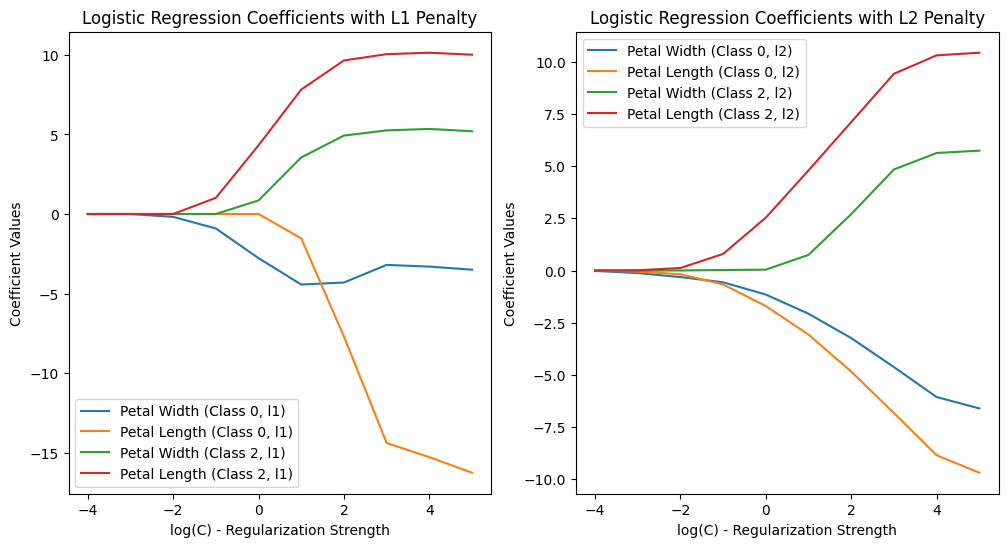

In [43]:
#load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  #to get only petal width and petal length
y = iris.target

#given C values
C_values = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 100, 1000, 10000, 100000]

#lists to store coefficients for each class (0 and 2)
coefficients_l1_class0 = []
coefficients_l1_class2 = []
coefficients_l2_class0 = []
coefficients_l2_class2 = []

#loop through each value of C
for C in C_values:
    #logistic regression models with 'l1' penalty
    model_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr') #liblinear sovlver since we are using l1
    model_l1.fit(X, y)
    coefficients_l1_class0.append(model_l1.coef_[0])
    coefficients_l1_class2.append(model_l1.coef_[2])

    #logistic regression models with 'l2' penalty
    model_l2 = LogisticRegression(penalty='l2', C=C, solver='liblinear', multi_class='ovr')
    model_l2.fit(X, y)
    coefficients_l2_class0.append(model_l2.coef_[0])
    coefficients_l2_class2.append(model_l2.coef_[2])


coefficients_l1_class0_width = [coeff[0] for coeff in coefficients_l1_class0]
coefficients_l1_class0_length = [coeff[1] for coeff in coefficients_l1_class0]
coefficients_l1_class2_width = [coeff[0] for coeff in coefficients_l1_class2]
coefficients_l1_class2_length = [coeff[1] for coeff in coefficients_l1_class2]

#plot coefficients for L1 penalty
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(np.log10(C_values), coefficients_l1_class0_width, label='Petal Width (Class 0, l1)')
plt.plot(np.log10(C_values), coefficients_l1_class0_length, label='Petal Length (Class 0, l1)')
plt.plot(np.log10(C_values), coefficients_l1_class2_width, label='Petal Width (Class 2, l1)')
plt.plot(np.log10(C_values), coefficients_l1_class2_length, label='Petal Length (Class 2, l1)')
plt.xlabel('log(C) - Regularization Strength')
plt.ylabel('Coefficient Values')
plt.title('Logistic Regression Coefficients with L1 Penalty')
plt.legend()

coefficients_l2_class0_width = [coeff[0] for coeff in coefficients_l2_class0]
coefficients_l2_class0_length = [coeff[1] for coeff in coefficients_l2_class0]
coefficients_l2_class2_width = [coeff[0] for coeff in coefficients_l2_class2]
coefficients_l2_class2_length = [coeff[1] for coeff in coefficients_l2_class2]

#plot coefficients for L2 penalty
plt.subplot(122)
plt.plot(np.log10(C_values), coefficients_l2_class0_width, label='Petal Width (Class 0, l2)')
plt.plot(np.log10(C_values), coefficients_l2_class0_length, label='Petal Length (Class 0, l2)')
plt.plot(np.log10(C_values), coefficients_l2_class2_width, label='Petal Width (Class 2, l2)')
plt.plot(np.log10(C_values), coefficients_l2_class2_length, label='Petal Length (Class 2, l2)')
plt.xlabel('log(C) - Regularization Strength')
plt.ylabel('Coefficient Values')
plt.title('Logistic Regression Coefficients with L2 Penalty')
plt.legend()
plt.show()

**Answer:**

Looking at both graphs we can see (as mentioned in part 1) that smaller values of C significantly increase regularization and simplify the model. However, we know that L2 will only lead to very small values but never to 0 while L1 can make coefficients 0 and entirely eliminate features.

When comparing L1 and L2 graphs we can see that as C gets smaller L1 has more significant 'jumps' towards 0 in the coefficient values while L2 has more subtle shifts towards 0. Further we can notice that in between $C$ being in between 1 and ${10}^{-2}$ most of the coefficient values when using L1 are at 0 (or very close to it) while for L2 they just start approacing 0 at $C={10}^{-2}$ (but we know they never make it exactly to 0 but just get very close to it).

## 4.4

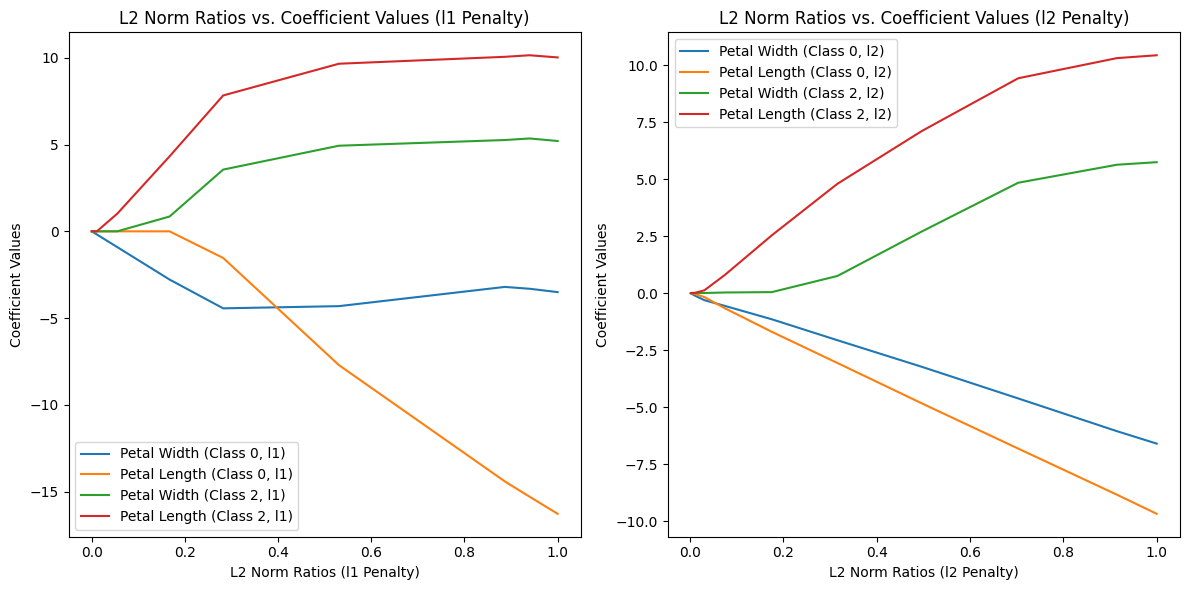

In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Calculate L2 norm ratios for 'l1' and 'l2' penalty
l2_norm_ratios_l1 = [np.linalg.norm(coeff) / np.linalg.norm(coefficients_l1_class0[-1]) for coeff in coefficients_l1_class0]
l2_norm_ratios_l2 = [np.linalg.norm(coeff) / np.linalg.norm(coefficients_l2_class0[-1]) for coeff in coefficients_l2_class0]

# Plot the L2 norm ratios vs. coefficient values for 'l1' penalty
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(l2_norm_ratios_l1, coefficients_l1_class0_width, label='Petal Width (Class 0, l1)')
plt.plot(l2_norm_ratios_l1, coefficients_l1_class0_length, label='Petal Length (Class 0, l1)')
plt.plot(l2_norm_ratios_l1, coefficients_l1_class2_width, label='Petal Width (Class 2, l1)')
plt.plot(l2_norm_ratios_l1, coefficients_l1_class2_length, label='Petal Length (Class 2, l1)')
plt.xlabel('L2 Norm Ratios (l1 Penalty)')
plt.ylabel('Coefficient Values')
plt.title('L2 Norm Ratios vs. Coefficient Values (l1 Penalty)')
plt.legend()

# Plot the L2 norm ratios vs. coefficient values for 'l2' penalty
plt.subplot(122)
plt.plot(l2_norm_ratios_l2, coefficients_l2_class0_width, label='Petal Width (Class 0, l2)')
plt.plot(l2_norm_ratios_l2, coefficients_l2_class0_length, label='Petal Length (Class 0, l2)')
plt.plot(l2_norm_ratios_l2, coefficients_l2_class2_width, label='Petal Width (Class 2, l2)')
plt.plot(l2_norm_ratios_l2, coefficients_l2_class2_length, label='Petal Length (Class 2, l2)')
plt.xlabel('L2 Norm Ratios (l2 Penalty)')
plt.ylabel('Coefficient Values')
plt.title('L2 Norm Ratios vs. Coefficient Values (l2 Penalty)')
plt.legend()

plt.tight_layout()
plt.show()


**Answer:**
From these graphs we can see that in both l1 and l2 penalty cases lower rations lead to more regularization and thus the coefficient values rise (absolute value wise) as the L2 norm rations rise.